# Palabras clave:

Bayes, Naive Bayes Multinomial y Gaussiano, Probabilidad, Probabilidad condicional, Likelihood, Verosimilitud, Clasificación, Tokenización, Stemming, Lemmatización, Distribución, Stop Words, NLTK, Count Vectorizer, Vocabulario, sklearn, dataframe, pandas, sparse matrix, NLP.

# Naive Bayes

En el reciente caso las probabilidades de ocurrencia de H o T quedaban multiplicadas ya que se asume independencia entre una tirada y otra de la moneda.
Naive Bayes es una técnica estadística que consiste en repetir el método anterior en problemas cuyos sucesos no son independientes, pero suponiendo independencia.
Pongamos como ejemplo la clasificación de artículos periodísticos. En este caso podríamos estimar la probabilidad de ocurrencia de cada palabra según la categoría a la que pertenece el artículo.

Veamos un ejemplo concreto

In [ ]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import numpy as np

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')




# Importo el paquete para graficar
from matplotlib import pyplot as plt


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
#Levanto la data de train y test
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)
twenty_test = fetch_20newsgroups(subset='test', shuffle=True)

classes = twenty_train.target_names
#Separo en Train y test (En X e y)
X_train = twenty_train.data
y_train = twenty_train.target
X_test = twenty_test.data
y_test = twenty_test.target


In [ ]:
print("Cantidad de Articulos en Train: {}".format(len(X_train)))
print("Cantidad de Articulos en Test: {}".format(len(X_test)))


Cantidad de Articulos en Train: 11314
Cantidad de Articulos en Test: 7532


In [ ]:
print("Cantidad de Targets en Train: {}".format(len(y_train))) #Cantidad de clasificaciones. Debería coincidir con la cantidad de artículos
print("Cantidad de Targets en Test: {}".format(len(y_test))) #Cantidad de clasificaciones. Debería coincidir con la cantidad de artículos


Cantidad de Targets en Train: 11314
Cantidad de Targets en Test: 7532


In [ ]:
#Distribución de los articulos
pd.DataFrame([[x,y] for x,y in zip(y_test,[classes[x] for x in y_train])], columns=["target", "target_classes"]).groupby("target_classes").size() / len(y_test)

target_classes
alt.atheism                 0.041423
comp.graphics               0.052177
comp.os.ms-windows.misc     0.051912
comp.sys.ibm.pc.hardware    0.054036
comp.sys.mac.hardware       0.052708
comp.windows.x              0.054434
misc.forsale                0.051381
rec.autos                   0.050850
rec.motorcycles             0.054036
rec.sport.baseball          0.053505
rec.sport.hockey            0.051779
sci.crypt                   0.052177
sci.electronics             0.053771
sci.med                     0.053638
sci.space                   0.049920
soc.religion.christian      0.052443
talk.politics.guns          0.047796
talk.politics.mideast       0.049920
talk.politics.misc          0.039830
talk.religion.misc          0.032262
dtype: float64

In [ ]:
articulo = 0
print("Primer Articulo")
print("*"*50)
print(X_train[articulo]) # Primer artículo
print("Target")
print("*"*50)
print(classes[y_train[articulo]]) 

Primer Articulo
**************************************************
From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





Target
**************************************************
rec.autos


En resumen, tenemos un dataset que contiene 11314 artículos periodísticos, clasificados en 20 tipos.
Ahora vamos a armar un bag of words y a filtrar un poco el vocabulario.

Vamos a aplicar el siguiente procesamiento:

- Tokenization (nltk)
- Lemmatization (nltk)
- Stop Words (nltk)
- Stemming (nltk)
- Filtrado de palabras
- Obtención del vocabulario (countvectorizer)
- Estimación de la probabilidad de ocurrencia de cada palabra para cada categoría
- Estimación de la probabilidad de cada categoría

Mas info en:
http://text-processing.com/demo/stem/

In [ ]:
#Se trabaja sobre un sólo artículo para ver cómo quedan

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
#Trabajo con la tokenizacion
art=X_train[0]
tok=word_tokenize(art)
print("\nArtículo tokenizado:")
print(tok)
#Trabajo con la Lemmantización
lem=[lemmatizer.lemmatize(x,pos='v') for x in tok]
print("\nLematización")
print(lem)
#Trabajo con las stopwords
stop = [x for x in lem if x not in stopwords.words('english')]
print("\nEliminando stopwords:")
print(stop)
#Trabajo con los stemming
stem=[stemmer.stem(x) for x in stop]
print("\nAplicando stemming")
print(stem)
alpha=[x for x in stem if x.isalpha()]
print("\nFiltrando no-palabras:")
print(alpha)


Artículo tokenizado:
['From', ':', 'lerxst', '@', 'wam.umd.edu', '(', 'where', "'s", 'my', 'thing', ')', 'Subject', ':', 'WHAT', 'car', 'is', 'this', '!', '?', 'Nntp-Posting-Host', ':', 'rac3.wam.umd.edu', 'Organization', ':', 'University', 'of', 'Maryland', ',', 'College', 'Park', 'Lines', ':', '15', 'I', 'was', 'wondering', 'if', 'anyone', 'out', 'there', 'could', 'enlighten', 'me', 'on', 'this', 'car', 'I', 'saw', 'the', 'other', 'day', '.', 'It', 'was', 'a', '2-door', 'sports', 'car', ',', 'looked', 'to', 'be', 'from', 'the', 'late', '60s/', 'early', '70s', '.', 'It', 'was', 'called', 'a', 'Bricklin', '.', 'The', 'doors', 'were', 'really', 'small', '.', 'In', 'addition', ',', 'the', 'front', 'bumper', 'was', 'separate', 'from', 'the', 'rest', 'of', 'the', 'body', '.', 'This', 'is', 'all', 'I', 'know', '.', 'If', 'anyone', 'can', 'tellme', 'a', 'model', 'name', ',', 'engine', 'specs', ',', 'years', 'of', 'production', ',', 'where', 'this', 'car', 'is', 'made', ',', 'history', ',', 

In [ ]:
def preprocesamientoArticulos(articulos):
  articulos_filtrados=list()
  for idx in range(len(articulos)):
    art=articulos[idx]
    tok=word_tokenize(art)
    lem=[lemmatizer.lemmatize(x,pos='v') for x in tok]
    stop = [x for x in lem if x not in stopwords.words('english')]
    stem=[stemmer.stem(x) for x in stop]
    alpha=[x for x in stem if x.isalpha()]
    articulos_filtrados.append(" ".join(alpha))
  return articulos_filtrados


In [ ]:
X_train_preprocesados = preprocesamientoArticulos(X_train)
X_test_preprocesados = preprocesamientoArticulos(X_test)

In [ ]:
#Salvado del procesamiento a disco:
import pickle

with open('art_filt_train.txt', 'wb') as fp:
    pickle.dump(X_train_preprocesados, fp)

with open('art_filt_test.txt', 'wb') as fp:
    pickle.dump(X_test_preprocesados, fp)



In [ ]:
with open ('art_filt_train.txt', 'rb') as fp:
    itemlist = pickle.load(fp)

In [ ]:
print("Lemmantizacion de la palabra being: {}".format(lemmatizer.lemmatize("being",pos='v')))
print("Stemming de la palabra president: {}".format(stemmer.stem("president")))

Lemmantizacion de la palabra being: be
Stemming de la palabra president: presid


In [ ]:
print(itemlist[0])

from lerxst thing subject what car organ univers maryland colleg park line i wonder anyon could enlighten car i saw day it sport car look late earli it call bricklin the door realli small in addit front bumper separ rest bodi thi i know if anyon tellm model name engin spec year product car make histori whatev info funki look car pleas thank il bring neighborhood lerxst


In [ ]:
# Extracting features from articles
from sklearn.feature_extraction.text import CountVectorizer
#El parametro max_df elimina las palabras más frecuentes, en este caso elimina aquellas palabras que aparecen en mas del 60%. Si el valor es un int, elimina las palabras que aparecen en valores absolutos
#El parámetro min_df elimina las palabras infrecuentes, en este caso, aquellas que hayan aparecido en 10 documentos o menos
count_vect = CountVectorizer(max_df=0.6,min_df=10)
count_vect.fit(itemlist) #Aprende el vocabulario y le asigna un código a cada palabra

CountVectorizer(max_df=0.6, min_df=10)

In [ ]:
print("Tamaño del vocabulario quitando las palabras que aparecen más del 60% y que aparecen menos de 10 veces: {}".format(len(count_vect.vocabulary_)))


Tamaño del vocabulario quitando las palabras que aparecen más del 60% y que aparecen menos de 10 veces: 9183


In [ ]:
vocabulary=count_vect.get_feature_names() #Estos nombres de las palabras seleccionadas para el vocabulario, ordenadas por orden alfabético
[x for x in vocabulary if "presi" in x]

['presid', 'presidenti']

In [ ]:
#[x for x in count_vect.vocabulary_.keys() if "presid" in x]
print("Indice de la palabra presid: {}".format(count_vect.vocabulary_["presid"]))

Indice de la palabra presid: 6279


In [ ]:
count_vect = CountVectorizer(max_df=0.8,min_df=100)
X_train_data=count_vect.fit_transform(itemlist) #Aprende el vocabulario y le asigna un código a cada palabra

In [ ]:
X_train_data.shape #Para cada documento hay un vector de ocurrencias

(11314, 1930)

In [ ]:
X_train_data.toarray() #Es una sparse matrix, vamos a expandirla

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
#Creo un dataframe con la matriz de ocurrencias de
columns=count_vect.get_feature_names()
df=pd.DataFrame(X_train_data.toarray(), columns=columns) # Se suma alpha a un artículo para que el log-likelihood no de -inf

In [ ]:
#Al dataframe le agrego el target
df["target_"]=y_train

Cantidad de palabras en el vocabulario:
1930
El vector de ocurrencias para la categoría 0 cuyo largo es 1930 es:
[26. 51.  3. ... 23. 63.  4.]

Log-probabilidad de ocurrencia de cada palabra en el vocabulario, para la categoría:alt.atheism
[3.86576862e-04 7.58285383e-04 4.46050225e-05 ... 3.41971839e-04
 9.36705473e-04 5.94733634e-05]

Log-probabilidad de ocurrencia de la categoría: alt.atheism
0.04242531377054976
El vector de ocurrencias para la categoría 1 cuyo largo es 1930 es:
[ 9. 62.  5. ...  9. 28.  5.]

Log-probabilidad de ocurrencia de cada palabra en el vocabulario, para la categoría:comp.graphics
[1.73577628e-04 1.19575699e-03 9.64320154e-05 ... 1.73577628e-04
 5.40019286e-04 9.64320154e-05]

Log-probabilidad de ocurrencia de la categoría: comp.graphics
0.05161746508750221
El vector de ocurrencias para la categoría 2 cuyo largo es 1930 es:
[13. 41.  8. ...  6. 27.  5.]

Log-probabilidad de ocurrencia de cada palabra en el vocabulario, para la categoría:comp.os.ms-windows.mis

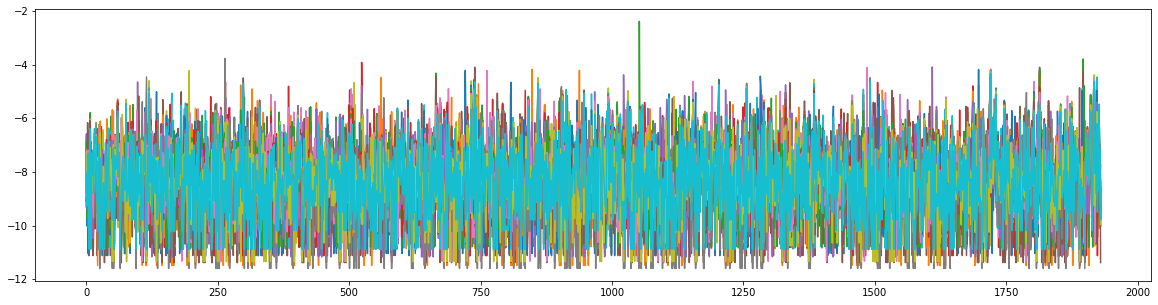

In [ ]:
N=20 #Cantidad de categorías a filtrar para calcular las probabilidades condicionales

p_priori=list() #Inicializo una lista para guardar los vectores de probabilidad de cada palabra, para cada categoría
p_model=list() #Inicializo una lista para guardar la probabilidad de ocurrencia de cada categoría

num_arts=df.values.shape[0] #Me quedo con la cantidad de artículos
num_cols=df.values.shape[1]-1 #Me quedo con la cantidad de palabras en el vocabulario
print("Cantidad de palabras en el vocabulario:")
print(num_cols)

plt.figure(figsize=(20, 5)) #Inicializo el gráfico sobre el que voy a dibujar todas las distribuciones
for i in range(20):
    p_aux=sum(df.loc[df['target_'] == i].drop('target_',axis=1).values)+alpha #Sumo las ocurrencias para la categoría i y le sumo a todos los valores alpha, para no tener probabilidad cero
    print("El vector de ocurrencias para la categoría {} cuyo largo es {} es:".format(i,len(p_aux)))
    print(p_aux)
    print("\nLog-probabilidad de ocurrencia de cada palabra en el vocabulario, para la categoría:{}".format(twenty_train["target_names"][i]))
    print(p_aux/sum(p_aux))
    p_priori.append(np.log(p_aux/sum(p_aux)))
    print("\nLog-probabilidad de ocurrencia de la categoría: {}".format(twenty_train["target_names"][i]))
    print(df.loc[df['target_'] == i].shape[0]/num_arts)
    p_model.append(np.log(df.loc[df['target_'] == i].shape[0]/num_arts))
     # Tamaño del gráfico
    plt.plot(p_priori[-1]) # Grafico
    #plt.title(title)
plt.show()

In [ ]:
#Agarramos un artículo en particular y calculamos el Likelihood de cada una de las categorías
n_art=56
print("Vamos a calcular los Log-likelihood para cada categoría. Utilizaremos el artículo {}".format(n_art))
print("El artículo pertenece a la categoría {}, la cual es {}".format(y_train[n_art], classes[y_train[n_art]]))
maxLogL=-float('inf')
for i in range(20):
    logL=np.dot((X_train_data.toarray()[n_art]),p_priori[i])+p_model[i]
    print("El log-likelihood para la categoría {} del artículo {} es:{}".format(i,n_art,logL))
    if logL>maxLogL:
        maxIdx=i
        maxLogL=logL
print("El Log-likelihood mayor pertenece a la categoría: {}".format(maxIdx))

Vamos a calcular los Log-likelihood para cada categoría. Utilizaremos el artículo 56
El artículo pertenece a la categoría 7, la cual es rec.autos
El log-likelihood para la categoría 0 del artículo 56 es:-1039.3376335511937
El log-likelihood para la categoría 1 del artículo 56 es:-1002.1174187896231
El log-likelihood para la categoría 2 del artículo 56 es:-1004.1325589535041
El log-likelihood para la categoría 3 del artículo 56 es:-988.842220053193
El log-likelihood para la categoría 4 del artículo 56 es:-1001.438669002169
El log-likelihood para la categoría 5 del artículo 56 es:-1032.0703272624012
El log-likelihood para la categoría 6 del artículo 56 es:-1009.779630206355
El log-likelihood para la categoría 7 del artículo 56 es:-927.2881339030977
El log-likelihood para la categoría 8 del artículo 56 es:-983.3285716721506
El log-likelihood para la categoría 9 del artículo 56 es:-1048.306281779206
El log-likelihood para la categoría 10 del artículo 56 es:-1041.4372494648555
El log-likeli

In [ ]:
from sklearn.naive_bayes import MultinomialNB

alpha=3.0

clf = MultinomialNB(alpha = alpha)
clf.fit(X_train_data.toarray(), y_train)
print("La predicción para el artículo {} es:".format(n_art))
print(clf.predict(X_train_data.toarray()[n_art:n_art+1]))

La predicción para el artículo 56 es:
[7]


In [ ]:
porc=sum(np.array(clf.predict(X_train_data.toarray()))==np.array(y_train)) / X_train_data.shape[0]*100
print("El porcentaje de artículos clasificados correctamente es: {}%".format(porc))

El porcentaje de artículos clasificados correctamente es: 83.55135230687644%


In [ ]:
with open ('art_filt_test.txt', 'rb') as fp:
    itemListTest = pickle.load(fp)
X_test_data = count_vect.transform(itemListTest) #Aprende el vocabulario y le asigna un código a cada palabra


porc=sum(np.array(clf.predict(X_test_data.toarray()))==np.array(y_test)) / X_test_data.shape[0]*100


In [ ]:
porc

70.80456718003187

# Ejercicio de multinomialNB

En el caso anterior, para medir la cantidad de artículos clasiicados correctamente se utilizó el mismo subconjunto del dataset que se utilizó para entrenar.

Esta medida no es una medida del todo útil, ya que lo que interesa de un clasificador es su capacidad de clasificación de datos que no fueron utilizados para entrenar. Es por eso que se pide, para el clasificador entrenado con el subconjunto de training, cual es el porcentaje de artículos del subconjunto de testing clasificados correctamente. Comparar con el porcentaje anterior y explicar las diferencias.

Para este ejercicio se puede utilizar el paquete multinomialNB que se encuentra dentro de naive-bayes en el paquete sklearn.

** Importante: para aplicar count vectorizer al dataset de testing sin redefinir el vocabulario, se debe usar el método transform, ya que fit y fit_transform recalculan el vocabulario. **

Se puede encontrar mas información del dataset en:

http://scikit-learn.org/stable/datasets/twenty_newsgroups.html#newsgroups

# Solución